# Density of DM halos

Implementation of the (Jing & Suto 2002) algorithm to compute density shapes. 


$\rho = \sum_{i} m_i W(r, h_i)$


$ W(r, h_i) = \dfrac{1}{\pi h_i^3} \begin{cases}
    1 - \dfrac{3}{2}\left(\dfrac{r}{h_i} \right)^2 + \dfrac{3}{4}\left(\dfrac{r}{h_i} \right)^3       & \quad \text{if } (r \leq h_i)\\
    \dfrac{1}{4}\left(2-\dfrac{r}{h_i}\right)^3  & \quad \text{if } (h_i \leq r \leq 2h_i)\\
    0 & \quad \text{otherwise}
  \end{cases} $
  
  
  $h_i$ is one half of the sphere containing the 32 neighboors

## To do:

1. Implement Inertia tensor.

In [2]:
%pylab inline
from sklearn.neighbors import KDTree
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


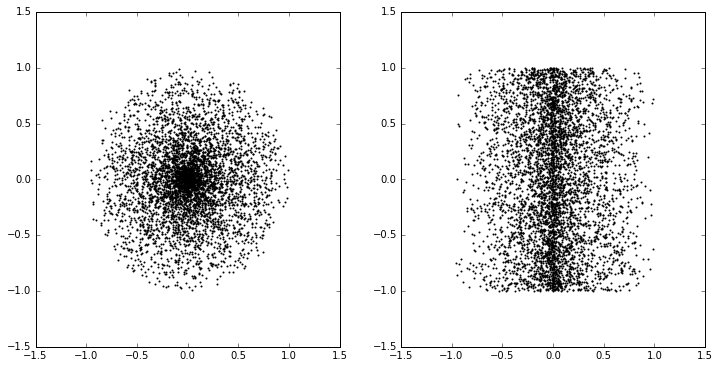

In [13]:
# Test particles to play with
figure(figsize=(12, 6))
n_particles = 5000
phi = random.rand(n_particles) * 2*pi
theta = random.rand(n_particles) * 2 - 1
R = random.rand(n_particles)
X = R * sin(phi) * sin(arccos(theta))
Y = R * cos(phi) * sin(arccos(theta))
Z = random.rand(n_particles) * 2 - 1
plt.subplot(1, 2, 1)
scatter(X, Y, s=1)
plt.subplot(1, 2, 2)
scatter(X, Z, s=1)
M = random.rand(n_particles) * 10 

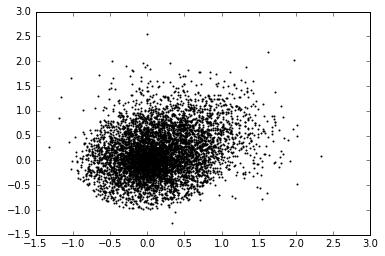

In [16]:

x1 = np.random.normal(0.5, 0.5, 2000)
y1 = np.random.normal(0.5, 0.5, 2000)
z1 = np.zeros(2000)

X1 = np.concatenate((X, x1))
Y1 = np.concatenate((Y, y1))
Z1 = np.concatenate((Z, z1))

scatter(X1, Y1, s=1)

## 1. Find the 32 nearest neighboors to each particle

[-0.36475621  0.30306165 -0.08504439] [0 0 0]
[[ 0.01168051  0.01429107  0.01980455  0.02311689  0.02336213  0.02404528
   0.02771241  0.02987227  0.02996507  0.03018248  0.03088806  0.0357262
   0.0394174   0.04044065  0.04240702  0.04390989  0.04761918  0.04825191
   0.05483748  0.05668082  0.05800868  0.06056245  0.06121823  0.06263949
   0.0634295   0.06390388  0.06415266  0.06569312  0.06634205  0.07012173
   0.07136456  0.07374321  0.07393449]]


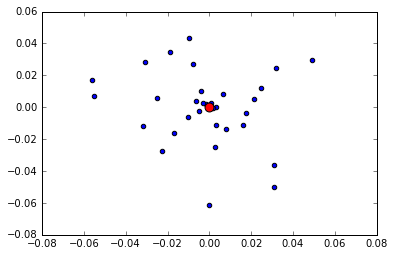

In [17]:
#playing with nearest neigboors
D = np.array([X, Y, Z])
D = D.T
tree = KDTree(D, leaf_size=2500) 
D1 = np.array([0, 0, 0])
dist, ind = tree.query(D1, k=33)   
scatter(X[ind], Y[ind])
scatter(D1[0], D1[1], s=80, c='r')
print D[0], D1
print dist

In [18]:
def nearest_neighboors(x, y, z, r):
    D = np.array([x, y, z])
    D = D.T
    tree = KDTree(D, leaf_size=2500)  
    dist, ind = tree.query(r, k=33)   
    return dist[0], ind[0]

In [19]:
distances, ids = nearest_neighboors(X, Y, Z, [0, 0,0])

In [20]:
distances[0]

0.011680510676167379

In [21]:
def kernel(r, h):
    if r<h:
        W = 1. - 3./2.*(r/h)**2.0 + 3./4.*(r/h)**3.0
    elif((r>h) & (r<2.0*h)):
        W = 1./4. * (2. - r/h)**3.
    else:
        W = 0.0
    return W/(np.pi*h**3.0)

In [22]:
def density(x,y,z, mass, r):
    dn, idn = nearest_neighboors(x, y, z, r)
    h = np.max(dn)/2.0
    rho = np.zeros(33.0)
    m = mass[idn]
    for i in range(len(dn)):
        W = kernel(dn[i], h)
        rho[i] = m[i]*W
    return np.sum(rho)

In [23]:
def grid(X, Y, Z, res):
    mass = np.ones(len(X))
    rho = np.zeros((res, res))
    rx = np.linspace(min(X)+min(X)*0.2, max(X)+max(X)*0.2, res)
    ry = np.linspace(min(Y)+min(Y)*0.2, max(Y)+max(Y)*0.2, res)
    for i in range(res):
        for j in range(res):
            rho[i][j] = density(X, Y, Z, mass, [rx[i], ry[j], 0])
    return rho
    

In [ ]:
# this might take a while depending on the resolution
Z = np.zeros(len(X))
rho_test = grid(X1, Y1, Z1, 500)

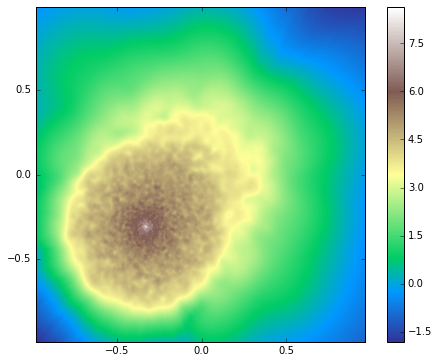

In [177]:
figure(figsize=(8,6))
imshow(np.log10(rho_test), origin='lower', extent=[min(X), max(X), min(Y), max(Y)], cmap='terrain')
colorbar()
#scatter(X, Y, s=0.1, alpha=0.5)

In [170]:
# My own library!
from density import grid

In [182]:
rho_1 = grid(X1, Y1, Z1, 100)

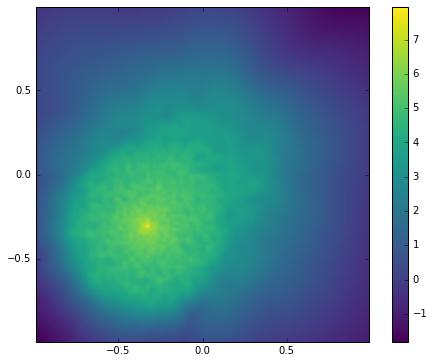

In [189]:
figure(figsize=(8,6))
imshow(np.log10(rho_1), origin='lower', extent=[min(X), max(X), min(Y), max(Y)], cmap='viridis')
colorbar()